In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
len(df)

150

In [5]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [18]:
df2=df.drop('Species',axis=1)

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [27]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df2)
pred=kmeans.labels_

In [28]:
from sklearn.metrics import silhouette_score
score=silhouette_score(df2,labels=pred,metric='euclidean')
score

0.5821934246576435

In [29]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(df2)
pred=kmeans.labels_

In [30]:
from sklearn.metrics import silhouette_score
score=silhouette_score(df2,labels=pred,metric='euclidean')
score

0.6204656046551029

In [ ]:
#according to kmeans 2 clusters is the optimal number of clusters

In [43]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=3,linkage='complete',affinity='euclidean').fit(df2)
labels=clustering.labels_

In [44]:
from sklearn.metrics import silhouette_score
score=silhouette_score(df2,labels=labels,metric='euclidean')
score

0.5730893012365899

In [45]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='euclidean').fit(df2)
labels=clustering.labels_

In [46]:
from sklearn.metrics import silhouette_score
score=silhouette_score(df2,labels=labels,metric='euclidean')
score

0.5876239594378092

In [ ]:
#using AgglomerativeClustering results almost in the same score but 2 clusters still better somehow

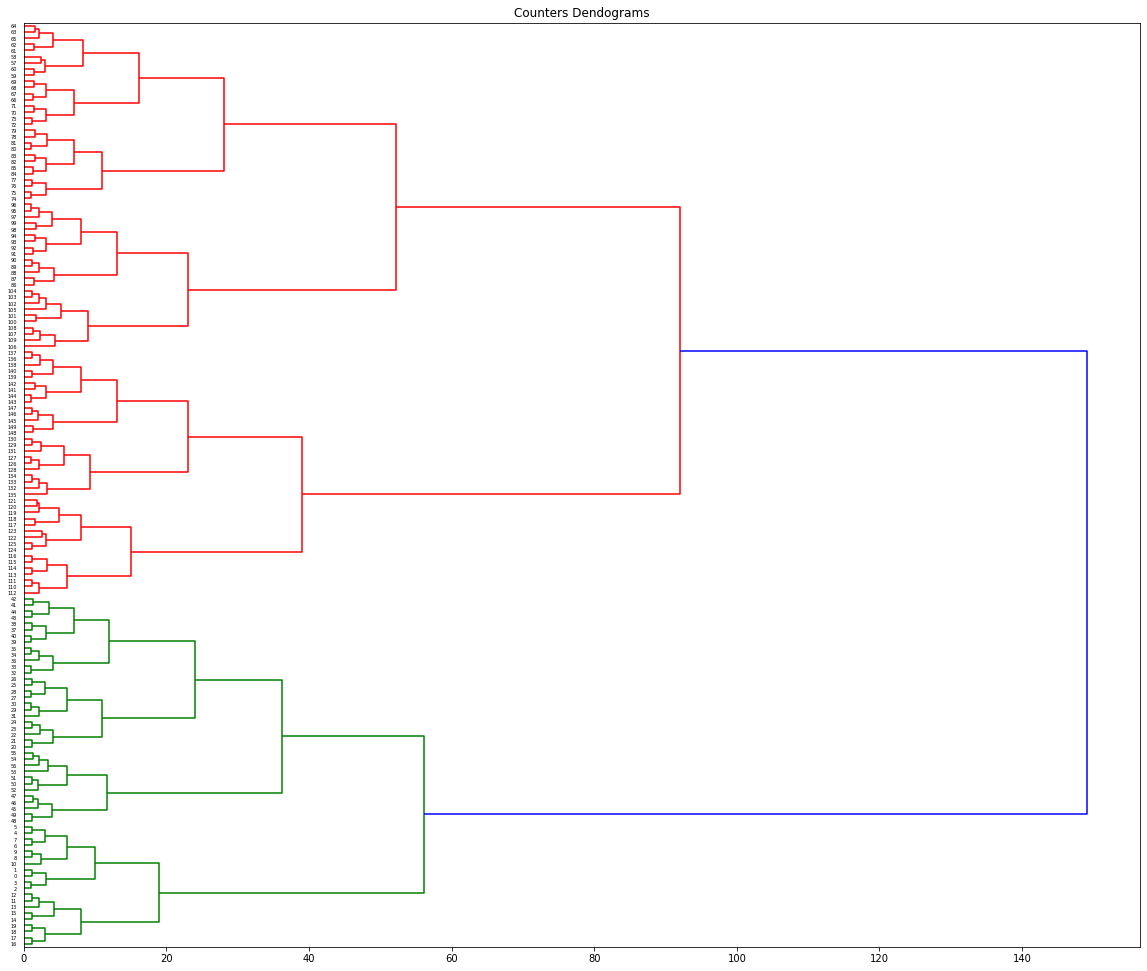

In [48]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 17))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df2, method='complete',metric='euclidean'),orientation='right')

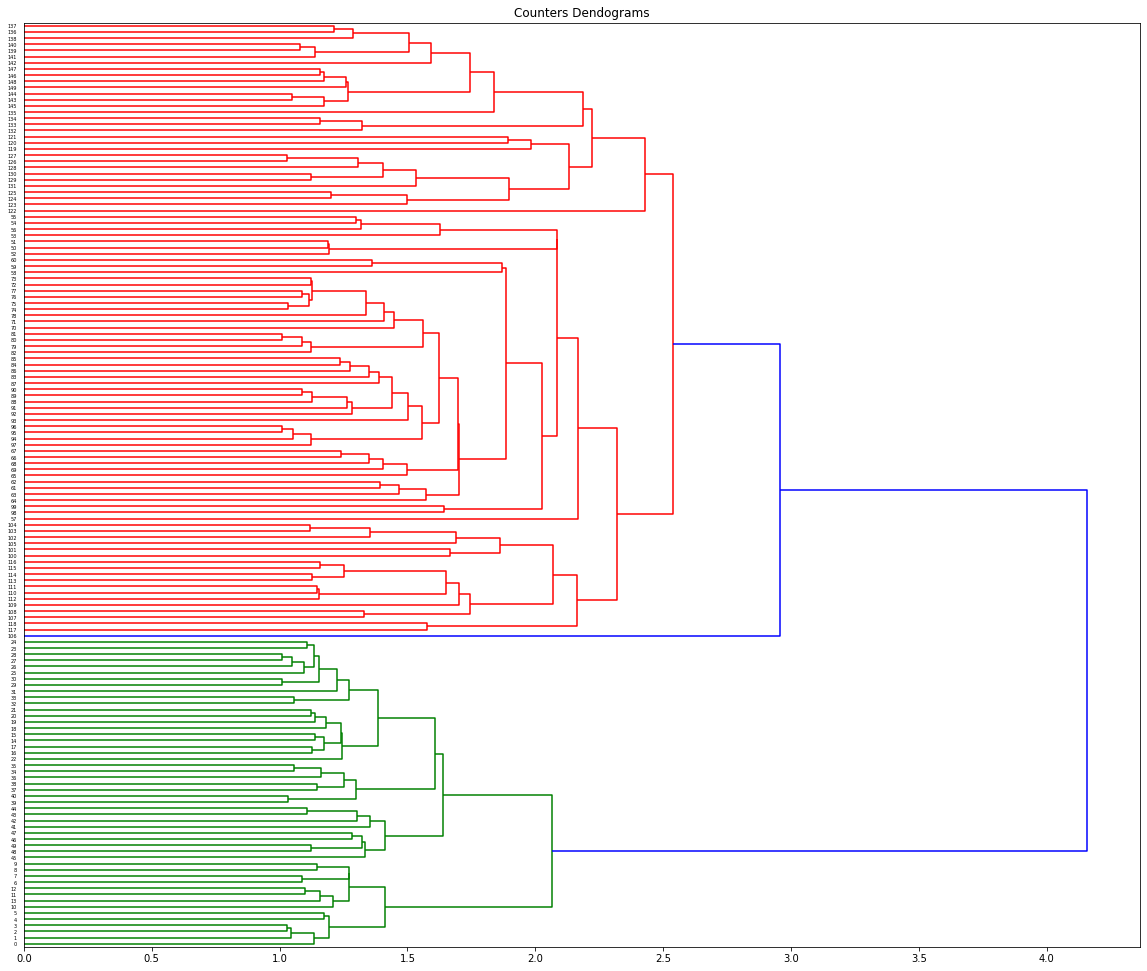

In [49]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 17))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df2, method='single',metric='euclidean'),orientation='right')

In [ ]:
#as you can see whether the method is single or complete  2 clusters still the best option

In [51]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [57]:
mins=5
nn = NearestNeighbors(n_neighbors=mins+1)

nn.fit(df2)

distances, neighbors = nn.kneighbors(df2)

distances

array([[0.        , 1.13578167, 2.06397674, 3.06920185, 4.00249922,
        5.03785669],
       [0.        , 1.04403065, 1.13578167, 2.02731349, 3.06104557,
        4.14608249],
       [0.        , 1.02956301, 1.04403065, 2.06397674, 2.06397674,
        3.19061123],
       [0.        , 1.02956301, 1.19163753, 2.02731349, 2.31516738,
        3.01827765],
       [0.        , 1.17473401, 1.19163753, 2.05182845, 2.06397674,
        3.00832179],
       [0.        , 1.17473401, 1.4106736 , 2.11896201, 2.31516738,
        3.19061123],
       [0.        , 1.08627805, 1.4106736 , 2.05182845, 2.07364414,
        3.01827765],
       [0.        , 1.08627805, 1.27279221, 2.02731349, 2.11896201,
        3.00832179],
       [0.        , 1.14455231, 1.27279221, 2.07364414, 2.37697286,
        3.07408523],
       [0.        , 1.14455231, 1.27279221, 2.02731349, 2.02977831,
        3.00499584],
       [0.        , 1.2083046 , 1.27279221, 2.20680765, 2.37697286,
        3.04138127],
       [0.        , 1

In [58]:
distances = np.sort(distances[:, mins], axis = 0)

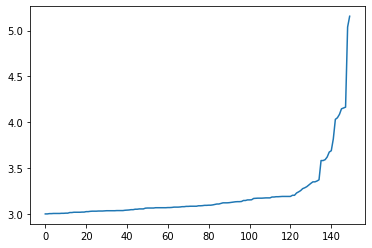

In [59]:
plt.plot(list(range(0,len(distances))),distances)
plt.show()

In [71]:
clustering = DBSCAN(eps=3.25, min_samples=2).fit(df2)

In [72]:
pred=clustering.labels_
set(pred)

{0, 1}

In [73]:
from sklearn.metrics import silhouette_score
res=silhouette_score(df2,labels=pred,metric='euclidean')
res

0.5598862400887489

In [ ]:
#as you can see even with DBSCAN  the ultimate number of clusters still 2